<a href="https://colab.research.google.com/github/JSJeong-me/2021-K-Digital-Training/blob/main/statistic_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLB 선수연봉 데이터 불러오기

In [1]:
!nvcc --version

'nvcc'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
!nvcc --help

'nvcc'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [8]:
import pandas as pd
df=pd.read_csv('http://wolfpack.hnu.ac.kr/Big_Data/data/MLB1871_2018/Salaries.csv')

In [9]:
df.shape

(26428, 5)

결측치 제거

In [10]:
df.dropna(inplace=True)
df.shape

(26428, 5)

*선수연봉* 2016년 subset

In [11]:
df18=df[(df['yearID']==2016) & (df['salary']>0)] #연봉 0 초과 선수만 활용
df18.head(3)

,yearID,teamID,lgID,playerID,salary
25575,2016,ARI,NL,ahmedni01,521600
25576,2016,ARI,NL,barreja01,507500
25577,2016,ARI,NL,brachsi01,509300


In [12]:
import plotly.express as px
fig = px.scatter(df18, x="salary", y="playerID", color="lgID",title="Player Salary with lgID")
fig.show()

ModuleNotFoundError: No module named 'plotly'

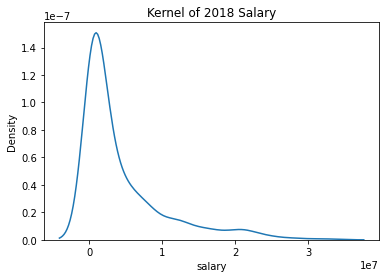

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(df18.salary).set_title('Kernel of 2018 Salary')
plt.show()

C:\anaconda3\envs\multi\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


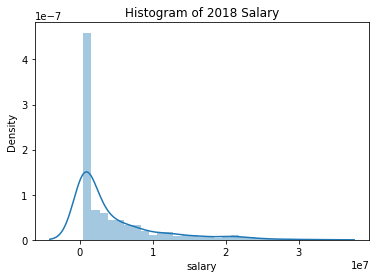

In [14]:
sns.distplot(df18.salary).set_title('Histogram of 2018 Salary')
plt.show()

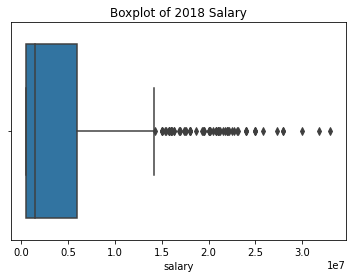

In [15]:
sns.boxplot(x="salary",data =df18).set_title('Boxplot of 2018 Salary')
plt.show()

## 실습


*   2018년 선수연봉과 2011년 선수연봉의 상자그림을 그리고 시각적으로 해석하시오.





##중심극한 정리 활용

sample data 만들기 n=50

In [22]:
df_sample=df18['salary'].sample(n=500, random_state=123) #seed=109

C:\anaconda3\envs\multi\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


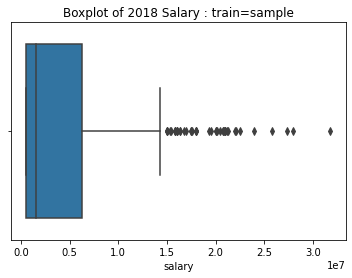

In [23]:
sns.boxplot(df_sample).set_title('Boxplot of 2018 Salary : train=sample')
plt.show()

In [19]:
df_sample.describe().round()

count          50.0
mean      3850525.0
std       4752988.0
min        507500.0
25%        520700.0
50%       1325000.0
75%       5500000.0
max      20000000.0
Name: salary, dtype: float64

크기 50인 확률표본  -> 평균, 100개 만들기

In [ ]:
xbar=[]
for k in range(0,100):
  xbar.append(df18['salary'].sample(n=50).mean())

In [ ]:
sns.boxplot(xbar).set_title('Boxplot of 2018 Salary : sample-mean')
plt.show()

##모집단 추론
2086년 MLB 선수들의 연봉이 40만불 이상인가?

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
print('Population mean %.1f' % df18['salary'].mean()) #모잡단 연봉

추정

In [ ]:
print('Point estimaor %.1f' % df_sample.mean())

In [ ]:
import scipy.stats as st
import numpy as np
LB=df_sample.mean()-st.t.ppf(0.975,df_sample.shape[0]-1)*df_sample.std()/np.sqrt(df_sample.shape[0])
UB=df_sample.mean()+st.t.ppf(0.975,df_sample.shape[0]-1)*df_sample.std()/np.sqrt(df_sample.shape[0])
print('95%'+' confidence interval (%.1f , %.1f)' % (LB, UB))

가설검정


> H0 : mu=40 H1: mu!=40



In [ ]:
from scipy import stats
stats.ttest_1samp(df_sample,40)